In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Divar.csv')

In [45]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df[['construction_year']].values

array([[nan],
       ['۱۳۸۴'],
       ['۱۴۰۱'],
       ...,
       ['قبل از ۱۳۷۰'],
       [nan],
       ['۱۳۸۲']], dtype=object)

In [46]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_info = missing_percent[missing_percent >
                               0].sort_values(ascending=False)

print("\n--- Missing Values ---")
for col, pct in missing_info.items():
    print(f"{col}: {missing_values[col]} missing ({pct:.2f}%)")


--- Missing Values ---
rent_to_single: 999981 missing (100.00%)
cost_per_extra_person: 989759 missing (98.98%)
rent_price_on_special_days: 989537 missing (98.95%)
rent_price_at_weekends: 986449 missing (98.64%)
rent_price_on_regular_days: 981932 missing (98.19%)
extra_person_capacity: 975991 missing (97.60%)
property_type: 972943 missing (97.29%)
has_sauna: 971521 missing (97.15%)
has_jacuzzi: 971272 missing (97.13%)
has_pool: 970610 missing (97.06%)
regular_person_capacity: 970130 missing (97.01%)
has_barbecue: 968802 missing (96.88%)
has_security_guard: 968688 missing (96.87%)
has_gas: 966570 missing (96.66%)
has_water: 966556 missing (96.66%)
has_electricity: 966555 missing (96.66%)
has_business_deed: 965321 missing (96.53%)
transformed_rent: 927591 missing (92.76%)
transformed_credit: 927591 missing (92.76%)
rent_type: 896039 missing (89.60%)
land_size: 813604 missing (81.36%)
deed_type: 746542 missing (74.65%)
user_type: 711118 missing (71.11%)
unit_per_floor: 697717 missing (69.

In [172]:
df.describe()

,Unnamed: 0,rent_value,price_value,credit_value,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,regular_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
count,1000000.000000,3.513220e+05,5.683460e+05,3.520950e+05,3.520850e+05,7.240900e+04,3.512480e+05,7.240900e+04,1.863960e+05,9.803940e+05,29870.000000,1.024100e+04,1.806800e+04,1.046300e+04,1.355100e+04,655608.000000,655608.000000,339699.000000
mean,499999.500000,4.102299e+10,1.736537e+10,4.872084e+10,4.872222e+10,8.557025e+09,4.103164e+10,1.619934e+07,4.165480e+03,4.440648e+03,6.557650,1.209785e+10,1.389016e+11,2.355548e+10,3.156551e+10,34.982108,51.629743,465.149147
std,288675.278933,3.807534e+12,5.878739e+11,4.341346e+12,4.341407e+12,2.064576e+12,3.807935e+12,5.217890e+07,1.218927e+05,1.367118e+05,7.698655,1.103482e+12,7.042335e+12,1.542049e+12,2.434942e+12,2.379169,3.160920,125.896250
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.626478,40.162369,0.000000
25%,249999.750000,1.111110e+05,1.400000e+09,1.000000e+08,1.000000e+08,2.000000e+08,1.111110e+05,1.000000e+06,1.100000e+02,7.500000e+01,3.000000,5.000000e+04,4.000000e+05,6.000000e+05,5.500000e+05,34.553551,50.677175,500.000000
50%,499999.500000,5.000000e+06,2.840000e+09,2.500000e+08,2.500000e+08,4.000000e+08,5.000000e+06,6.000000e+06,1.950000e+02,1.030000e+02,4.000000,1.000000e+05,8.000000e+05,1.200000e+06,1.100000e+06,35.723312,51.345791,500.000000
75%,749999.250000,1.200000e+07,5.900000e+09,5.000000e+08,5.000000e+08,8.500000e+08,1.200000e+07,1.500000e+07,2.800000e+02,1.650000e+02,7.000000,2.000000e+05,1.600000e+06,2.500000e+06,2.500000e+06,36.307013,51.805291,500.000000
max,999999.000000,1.000000e+15,1.000000e+14,1.000000e+15,1.000000e+15,5.555556e+14,1.000000e+15,3.000000e+09,1.000000e+07,1.000000e+07,50.000000,1.111111e+14,5.006007e+14,1.111111e+14,2.002503e+14,40.358055,74.511620,500.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [174]:
df['cat2_slug'].unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [175]:
df['cat3_slug'].unique()

array(['villa', 'apartment-sell', 'apartment-rent', 'office-rent',
       'shop-sell', 'plot-old', 'house-villa-sell', 'house-villa-rent',
       'shop-rent', 'industry-agriculture-business-rent', 'office-sell',
       'industry-agriculture-business-sell', 'presell', 'suite-apartment',
       'partnership', 'workspace', nan], dtype=object)

### ۱.  توزیع آگهی‌ها در دسته‌بندی‌های سطح دو  


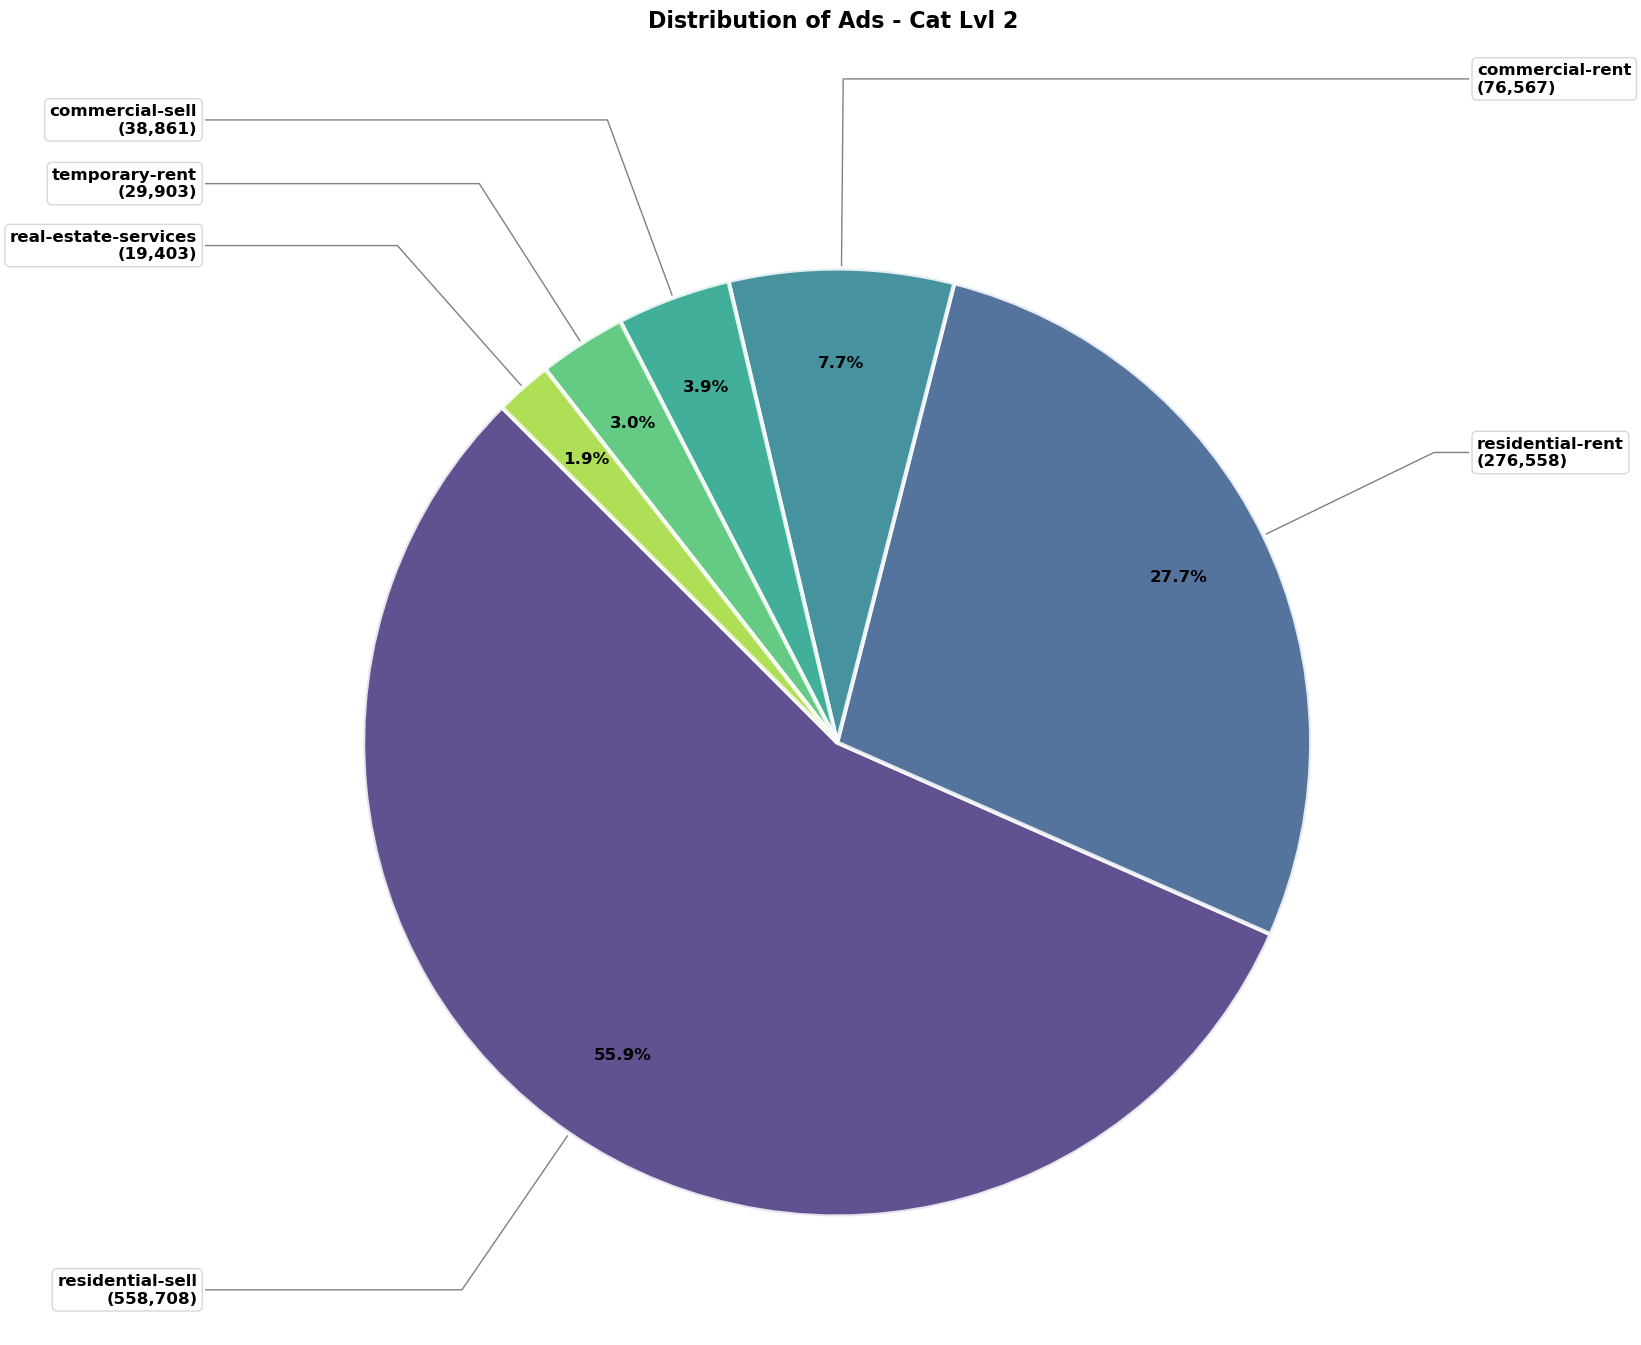

In [3]:
# Part 1

plt.figure(figsize=(18, 12))
cat2_counts = df['cat2_slug'].value_counts()

threshold = 0.01
filtered_counts = cat2_counts[cat2_counts/cat2_counts.sum() > threshold]
other_count = cat2_counts[cat2_counts/cat2_counts.sum() <= threshold].sum()

if other_count > 0:
    filtered_counts = pd.concat(
        [filtered_counts, pd.Series({'Other': other_count})])

# Create pie chart - rotated 45 degrees clockwise (startangle=135)
wedges, ـ, autotexts = plt.pie(
    filtered_counts.values,
    labels=None,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=135,  # Rotated 45 degrees clockwise
    colors=sns.color_palette("viridis", len(filtered_counts)),
    pctdistance=0.8,
    textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'},
    wedgeprops={'linewidth': 3, 'edgecolor': 'white', 'alpha': 0.85}
)

# Make percentage text bold and visible
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_fontweight('semibold')  # Added bold
    # Remove background for cleaner look
    autotext.set_bbox(None)

# Add labels with leader lines
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white",
                  edgecolor="lightgray", alpha=0.9)
kw = dict(arrowprops=dict(arrowstyle="-", color="gray", lw=1),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Add category name and count
    label_text = f"{filtered_counts.index[i]}\n({filtered_counts.iloc[i]:,})"
    plt.annotate(
        label_text,
        xy=(x, y),
        xytext=(1.35*np.sign(x), 1.4*y),
        horizontalalignment=horizontalalignment,
        fontsize=12,
        fontweight='semibold',  # Added bold to labels
        **kw
    )

# Add title with more margin to prevent overlap with leader lines
plt.title('Distribution of Ads - Cat Lvl 2 \n\n',
          fontsize=16, fontweight='bold', pad=50)

# Add legend for very small slices if needed
if other_count > 0:
    plt.legend([f"Other (<{threshold*100:.0f}%)"],
               loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout with more top margin
plt.tight_layout()
plt.subplots_adjust(top=1)  # Added more top margin
plt.show()

### ۱.  توزیع آگهی‌ها در دسته‌بندی‌های سطح سه  


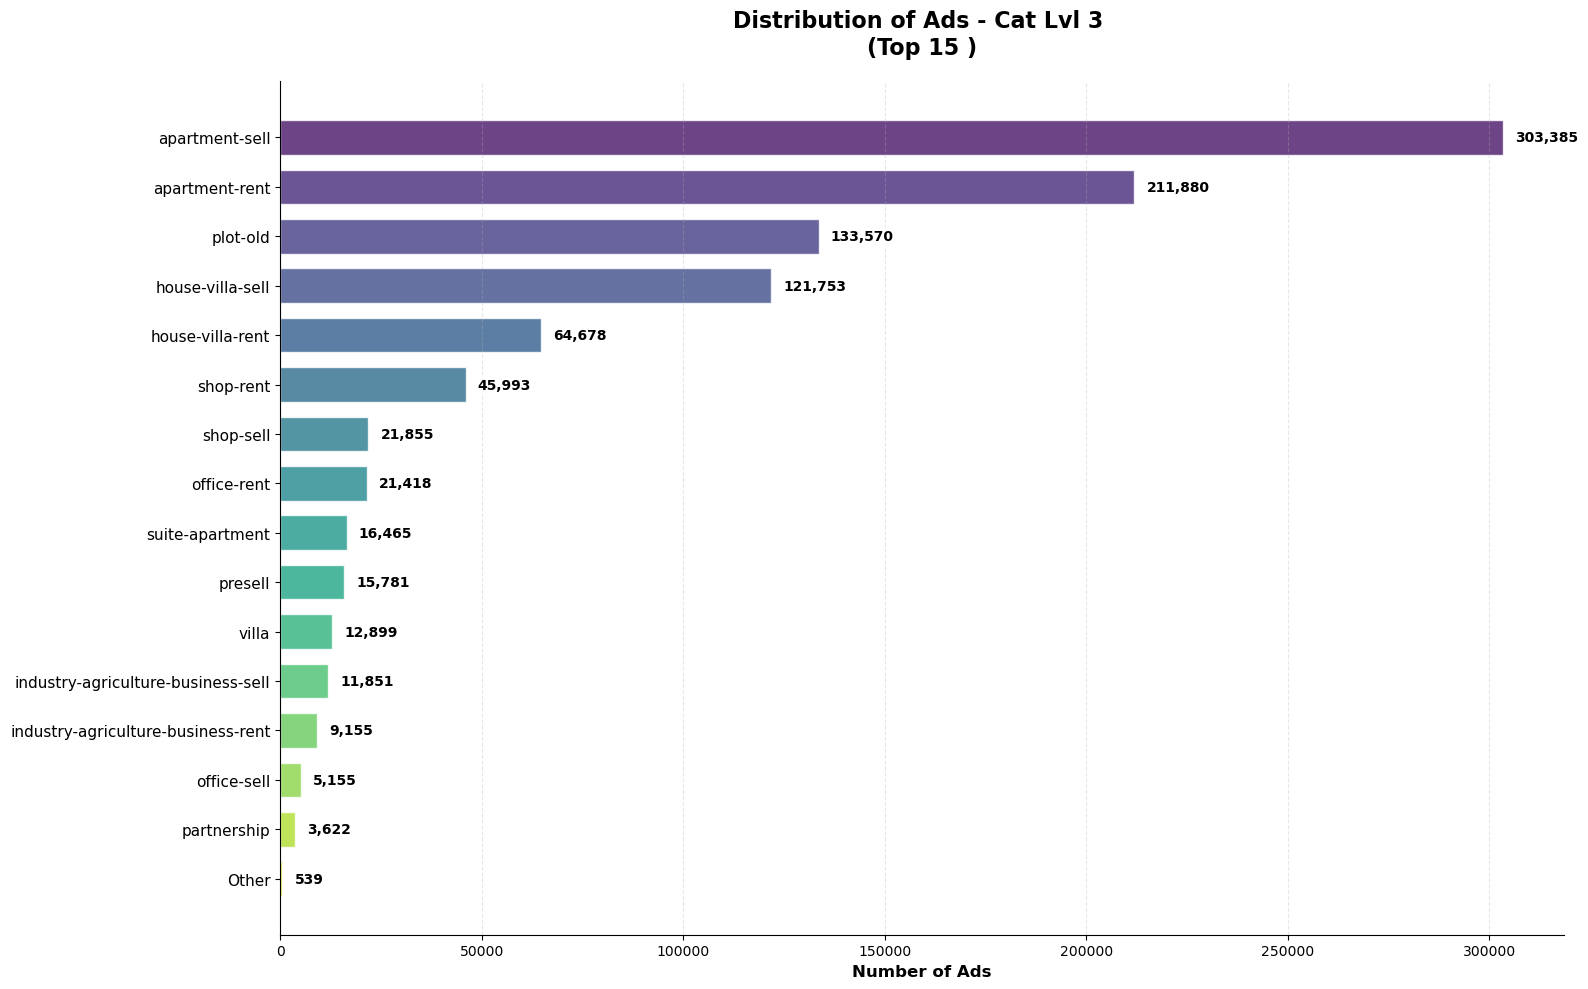

In [4]:
# --- SECOND FIGURE: Level 3
plt.figure(figsize=(16, 10))
cat3_counts = df['cat3_slug'].value_counts()

# Limit to top N categories for better readability
top_n = 15
if len(cat3_counts) > top_n:
    top_categories = cat3_counts.head(top_n)
    other_count_bar = cat3_counts[top_n:].sum()
    top_categories = pd.concat(
        [top_categories, pd.Series({'Other': other_count_bar})])
else:
    top_categories = cat3_counts

# Create horizontal bar chart
y_pos = np.arange(len(top_categories))
bars = plt.barh(
    y_pos,
    top_categories.values,
    color=sns.color_palette("viridis", len(top_categories)),
    alpha=0.8,
    edgecolor='white',
    linewidth=1,
    height=0.7
)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_categories.values) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             ha='left',
             va='center',
             fontsize=10,
             fontweight='bold',  # Keep bold for bar chart numbers
             bbox=dict(facecolor='white', alpha=0.8, pad=2, edgecolor='none'))

plt.yticks(y_pos, [label[:35] + '...' if len(label) > 35 else label
                   for label in top_categories.index],
           fontsize=11)
plt.gca().invert_yaxis()  # Display highest values at top
plt.xlabel('Number of Ads', fontsize=12, fontweight='bold')
plt.title('Distribution of Ads - Cat Lvl 3 \n(Top {} )'.format(top_n),
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Remove spines for cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [5]:
# Extract all unique values from the construction_year column
unique_values = df['construction_year'].unique()

# Convert to list and display
unique_values_list = unique_values.tolist()
print("Unique values in construction_year column:")
for i, value in enumerate(unique_values_list, 1):
    print(f"{i}. {value}")



Unique values in construction_year column:
1. nan
2. ۱۳۸۴
3. ۱۴۰۱
4. ۱۴۰۰
5. ۱۴۰۳
6. ۱۳۸۹
7. ۱۳۹۵
8. ۱۳۹۳
9. ۱۳۹۶
10. ۱۳۸۷
11. ۱۳۸۵
12. ۱۳۹۰
13. ۱۳۹۸
14. ۱۴۰۲
15. ۱۳۸۸
16. قبل از ۱۳۷۰
17. ۱۳۹۲
18. ۱۳۸۳
19. ۱۳۹۴
20. ۱۳۹۱
21. ۱۳۸۰
22. ۱۳۷۸
23. ۱۳۷۵
24. ۱۳۹۷
25. ۱۳۹۹
26. ۱۳۸۲
27. ۱۳۸۶
28. ۱۳۷۹
29. ۱۳۷۲
30. ۱۳۷۴
31. ۱۳۷۶
32. ۱۳۷۷
33. ۱۳۷۱
34. ۱۳۸۱
35. ۱۳۷۳


In [6]:
# Convert Persian digits to English digits with error handling
persian_to_english_map = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')

df['construction_year'] = (
    df['construction_year']
    .astype(str)
    .apply(lambda x: x.translate(persian_to_english_map) if isinstance(x, str) else x)
    .str.extract(r'(\d+)', expand=False)   # Extract only digits
)

# Convert to numeric, coercing errors to NaN
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

# Check result
print(df['construction_year'].sort_values().unique())


[1370. 1371. 1372. 1373. 1374. 1375. 1376. 1377. 1378. 1379. 1380. 1381.
 1382. 1383. 1384. 1385. 1386. 1387. 1388. 1389. 1390. 1391. 1392. 1393.
 1394. 1395. 1396. 1397. 1398. 1399. 1400. 1401. 1402. 1403.   nan]


In [7]:
a = df['construction_year'].isna().mean() * 100
print(a)

18.4172


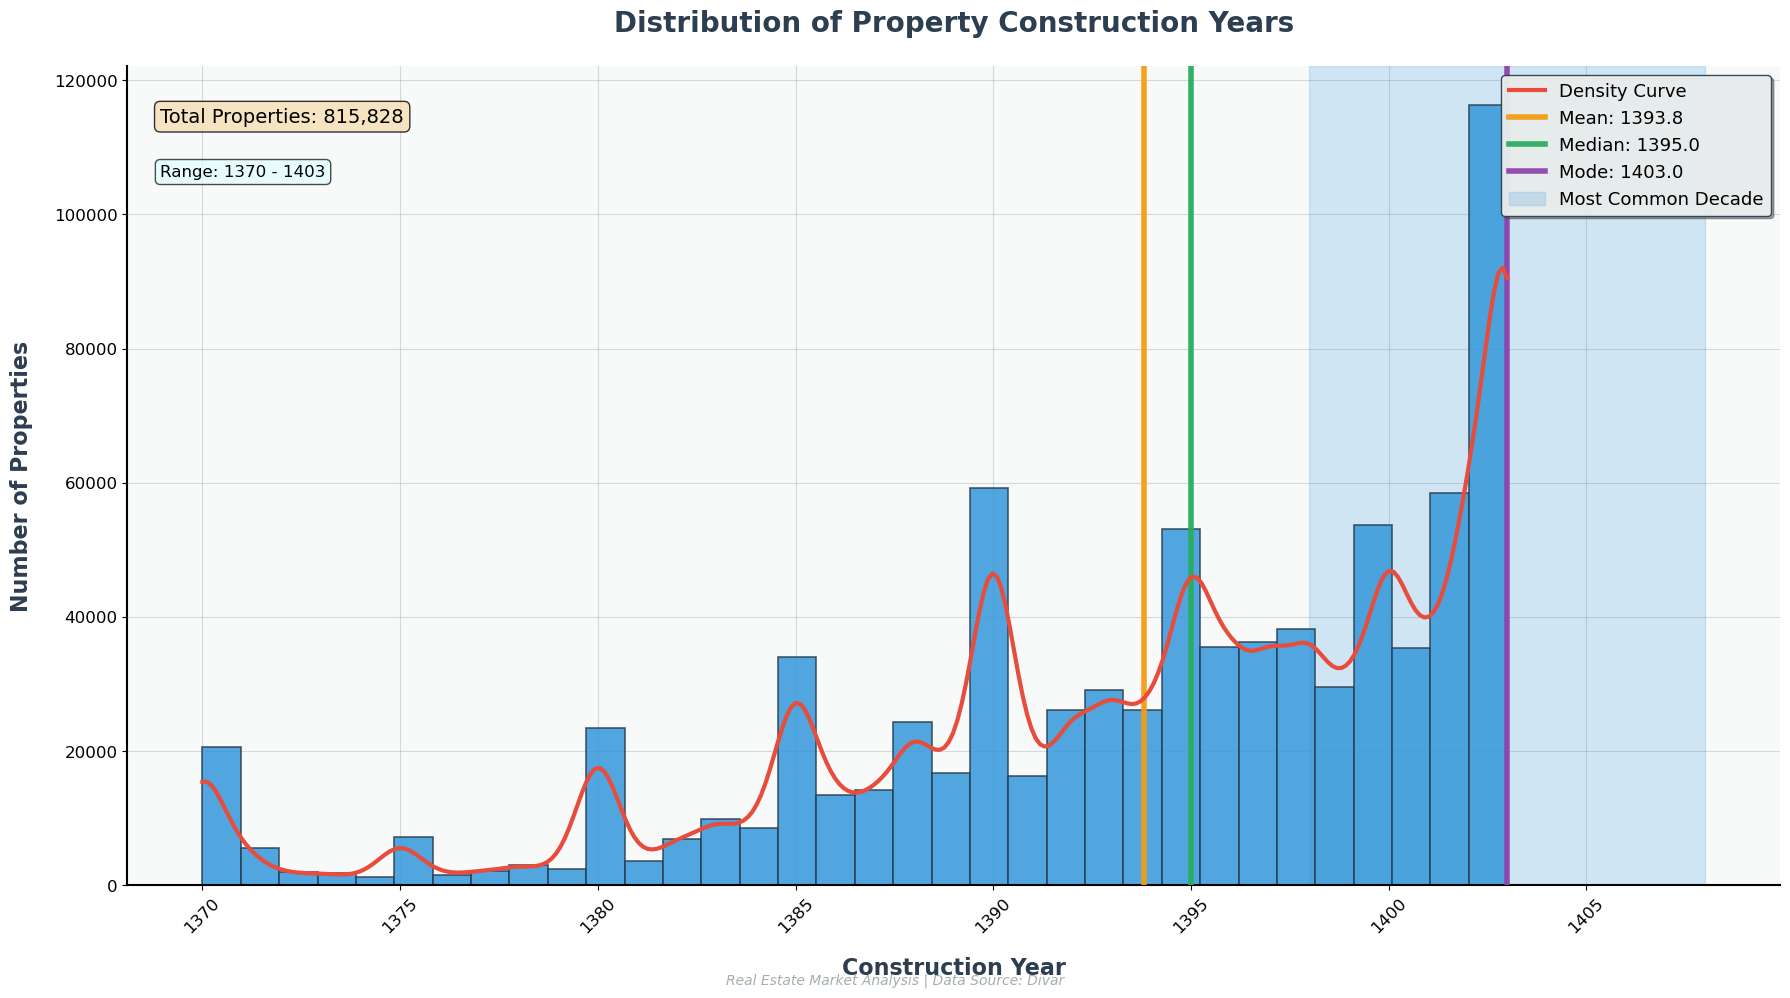

In [8]:
# Part 2: Enhanced Construction Year Distribution Visualization

from scipy.stats import gaussian_kde
plt.figure(figsize=(18, 10))

# Prepare data
clean_data = df['construction_year'].dropna()
mean_year = clean_data.mean()
median_year = clean_data.median()
mode_year = clean_data.mode().iloc[0]

# Create histogram with a more refined color scheme
n, bins, patches = plt.hist(clean_data, bins=34, color='#3498DB', alpha=0.85,
                            edgecolor='#2C3E50', linewidth=1.2, zorder=2,
                            density=False)

# Add a KDE curve for smoother distribution visualization
kde = gaussian_kde(clean_data)
x_range = np.linspace(clean_data.min(), clean_data.max(), 300)
kde_values = kde(x_range) * len(clean_data) * \
    (bins[1] - bins[0])  # Scale to match histogram
plt.plot(x_range, kde_values, color='#E74C3C',
         linewidth=3, label='Density Curve', zorder=4)

# Customize the plot with better styling
plt.title('Distribution of Property Construction Years',
          fontsize=20, fontweight='bold', pad=25, color='#2C3E50')
plt.xlabel('Construction Year', fontsize=16,
           fontweight='semibold', color='#2C3E50', labelpad=15)
plt.ylabel('Number of Properties', fontsize=16,
           fontweight='semibold', color='#2C3E50', labelpad=15)

# Add vertical lines for statistics with improved styling
plt.axvline(mean_year, color='#F39C12', linestyle='-', linewidth=4,
            label=f'Mean: {mean_year:.1f}', alpha=0.95, zorder=3)
plt.axvline(median_year, color='#27AE60', linestyle='-', linewidth=4,
            label=f'Median: {median_year:.1f}', alpha=0.95, zorder=3)
plt.axvline(mode_year, color='#8E44AD', linestyle='-', linewidth=4,
            label=f'Mode: {mode_year:.1f}', alpha=0.95, zorder=3)

# Add a shaded region for the most common decade
common_decade_start = mode_year - 5
common_decade_end = mode_year + 5
plt.axvspan(common_decade_start, common_decade_end, alpha=0.2, color='#3498DB',
            label='Most Common Decade')

# Add text annotations for important statistics
plt.text(0.02, 0.95, f'Total Properties: {len(clean_data):,}', transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.text(0.02, 0.88, f'Range: {clean_data.min():.0f} - {clean_data.max():.0f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.7))

# Add legend with better styling
legend = plt.legend(fontsize=13, frameon=True, fancybox=True,
                    shadow=True, loc='upper right')
legend.get_frame().set_facecolor('#ECF0F1')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor('#2C3E50')

# Customize grid and spines
plt.grid(True, alpha=0.3, linestyle='-',
         linewidth=0.8, zorder=1, color='#7F8C8D')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_facecolor('#F8F9F9')

# Improve tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add a subtle watermark
plt.figtext(0.5, 0.01, 'Real Estate Market Analysis | Data Source: Divar',
            ha='center', fontsize=10, style='italic', alpha=0.7, color='#7F8C8D')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

In [9]:
from persiantools.jdatetime import JalaliDate

# Ensure datetime conversion
df['created_at_month'] = pd.to_datetime(
    df['created_at_month'], errors='coerce')

# Convert to JalaliDate and extract month directly
df['shamsi_date'] = df['created_at_month'].apply(
    lambda x: JalaliDate(x) if pd.notna(x) else None
)

# Shamsi month mapping
shamsi_month_map = {
    1: 'Farvardin', 2: 'Ordibehesht', 3: 'Khordad', 4: 'Tir',
    5: 'Mordad', 6: 'Shahrivar', 7: 'Mehr', 8: 'Aban',
    9: 'Azar', 10: 'Dey', 11: 'Bahman', 12: 'Esfand'
}

# Extract Shamsi month names directly
df['shamsi_month'] = df['shamsi_date'].apply(
    lambda j: shamsi_month_map[j.month] if j is not None else None
)

# Classify ad types (vectorized instead of lambda inside apply)
df['ad_type'] = 'other'
df.loc[df['cat2_slug'].astype(str).str.contains(
    'rent', case=False, na=False), 'ad_type'] = 'rent'
df.loc[df['cat2_slug'].astype(str).str.contains(
    'sell', case=False, na=False), 'ad_type'] = 'sale'

# Aggregate monthly counts with groupby (no manual loops)
monthly_counts = (
    df[df['shamsi_month'].notna() & df['ad_type'].isin(['rent', 'sale'])]
    .groupby(['shamsi_month', 'ad_type'])
    .size()
    .reset_index(name='count')
)

# Enforce correct Shamsi month order
month_order = list(shamsi_month_map.values())
monthly_counts['shamsi_month'] = pd.Categorical(
    monthly_counts['shamsi_month'], categories=month_order, ordered=True
)
monthly_counts = monthly_counts.sort_values(
    ['shamsi_month', 'ad_type']).reset_index(drop=True)

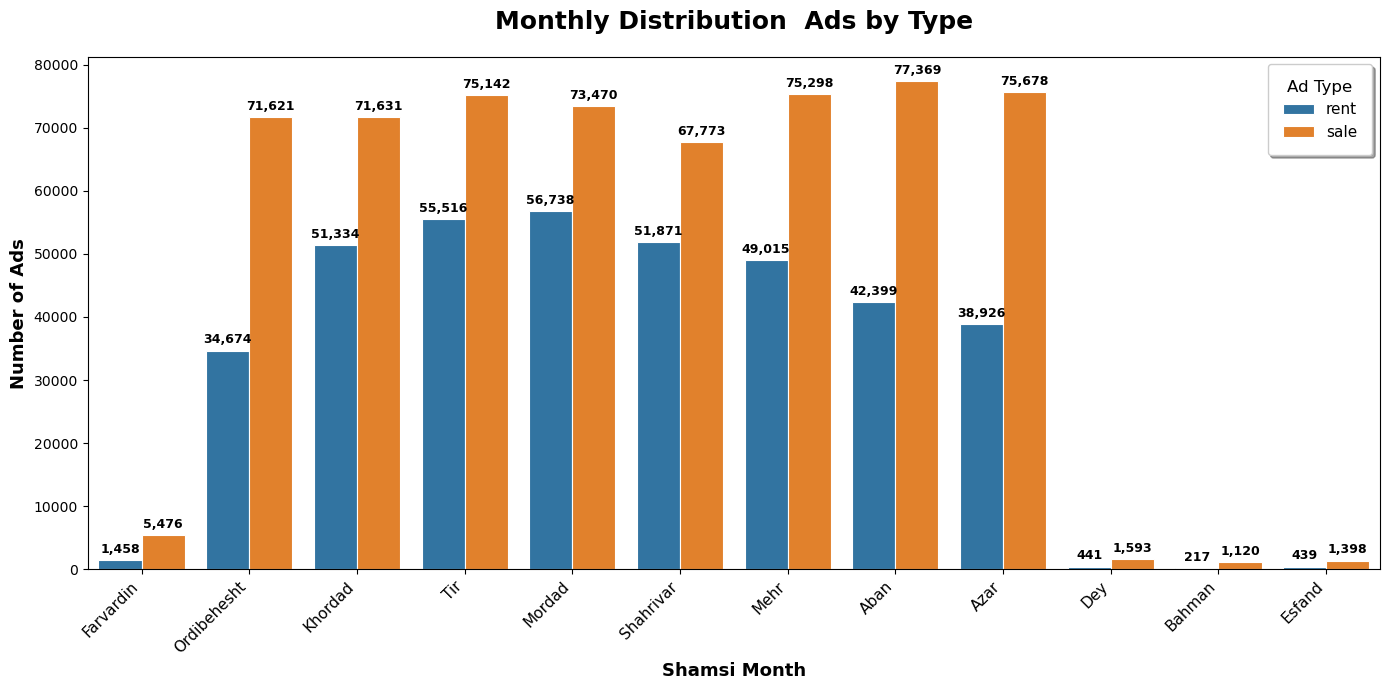

In [10]:

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='shamsi_month',
    y='count',
    hue='ad_type',
    data=monthly_counts,
    palette={'rent': '#1f77b4', 'sale': '#ff7f0e'},
    edgecolor='white',
    linewidth=0.8
)

# Add value labels on each bar
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # avoid showing labels for empty bars
        barplot.annotate(
            f'{int(height):,}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, weight='semibold', color='black',
            xytext=(0, 3), textcoords='offset points'
        )

# Titles and labels
plt.title('Monthly Distribution  Ads by Type',
          fontsize=18, weight='bold', pad=20)
plt.xlabel('Shamsi Month', fontsize=13, weight='bold')
plt.ylabel('Number of Ads', fontsize=13, weight='bold')

# Improve x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=11, weight='medium')

# Adjust legend style
plt.legend(
    title='Ad Type',
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    shadow=True,
    loc='upper right',
    borderpad=1
)

# Final layout adjustments
plt.tight_layout()
plt.show()

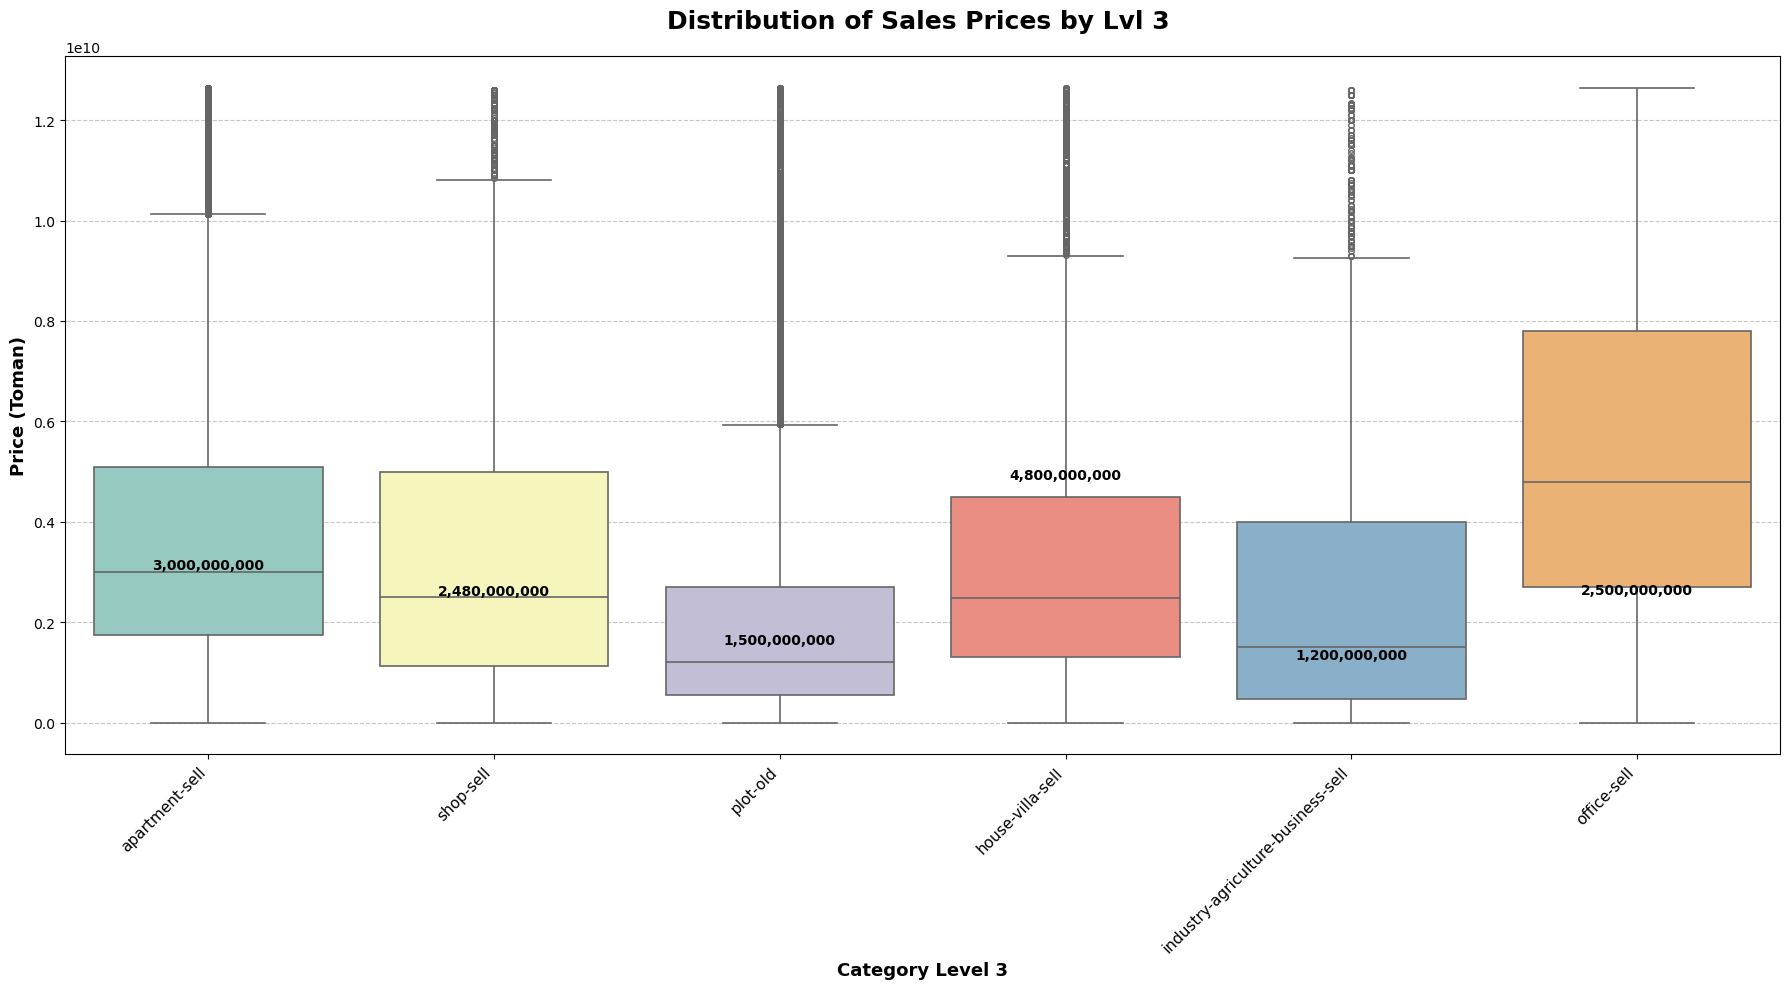

In [ ]:

# Filter only 'sell' ads
sell_data = df[df['cat2_slug'].str.contains('sell', na=False)]

if len(sell_data) > 0:

    # Remove outliers using IQR
    Q1 = sell_data['price_value'].quantile(0.25)
    Q3 = sell_data['price_value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = sell_data[
        (sell_data['price_value'] >= lower_bound) &
        (sell_data['price_value'] <= upper_bound)
    ]

    plt.figure(figsize=(18, 10))
    boxplot = sns.boxplot(
        data=filtered_data,
        x='cat3_slug',
        y='price_value',
        palette='Set3',
        linewidth=1.2,
        fliersize=4
    )

    # Titles and labels
    plt.title('Distribution of Sales Prices by Lvl 3 ',
              fontsize=18, weight='bold', pad=20)
    plt.xlabel('Category Level 3', fontsize=13, weight='bold')
    plt.ylabel('Price (Toman)', fontsize=13, weight='bold')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=11)

    # Format y-axis with scientific notation if large range
    plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))

    # Add gridlines for y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show medians clearly
    medians = filtered_data.groupby('cat3_slug')['price_value'].median().values
    for xtick, median in enumerate(medians):
        plt.text(xtick, median, f'{int(median):,}', horizontalalignment='center',
                 size='10', color='black', weight='bold', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap


m = folium.Map(
    location=[32.4279, 53.6880],
    zoom_start=6,
    tiles="CartoDB positron"
)


heat_data = df[['location_latitude', 'location_longitude']
               ].dropna().values.tolist()

HeatMap(
    heat_data,
    radius=7.5,       # smoother & larger clusters
    blur=9,         # softer transitions
    max_zoom=30,     # higher zoom resolution
    gradient={
        0.05: 'navy',
        0.15: 'blue',
        0.25: 'deepskyblue',
        0.35: 'cyan',
        0.45: 'lime',
        0.55: 'yellowgreen',
        0.65: 'yellow',
        0.75: 'orange',
        0.85: 'orangered',
        0.95: 'red'}
).add_to(m)


m.save("IranGeo-Ads_HeatMap.html")

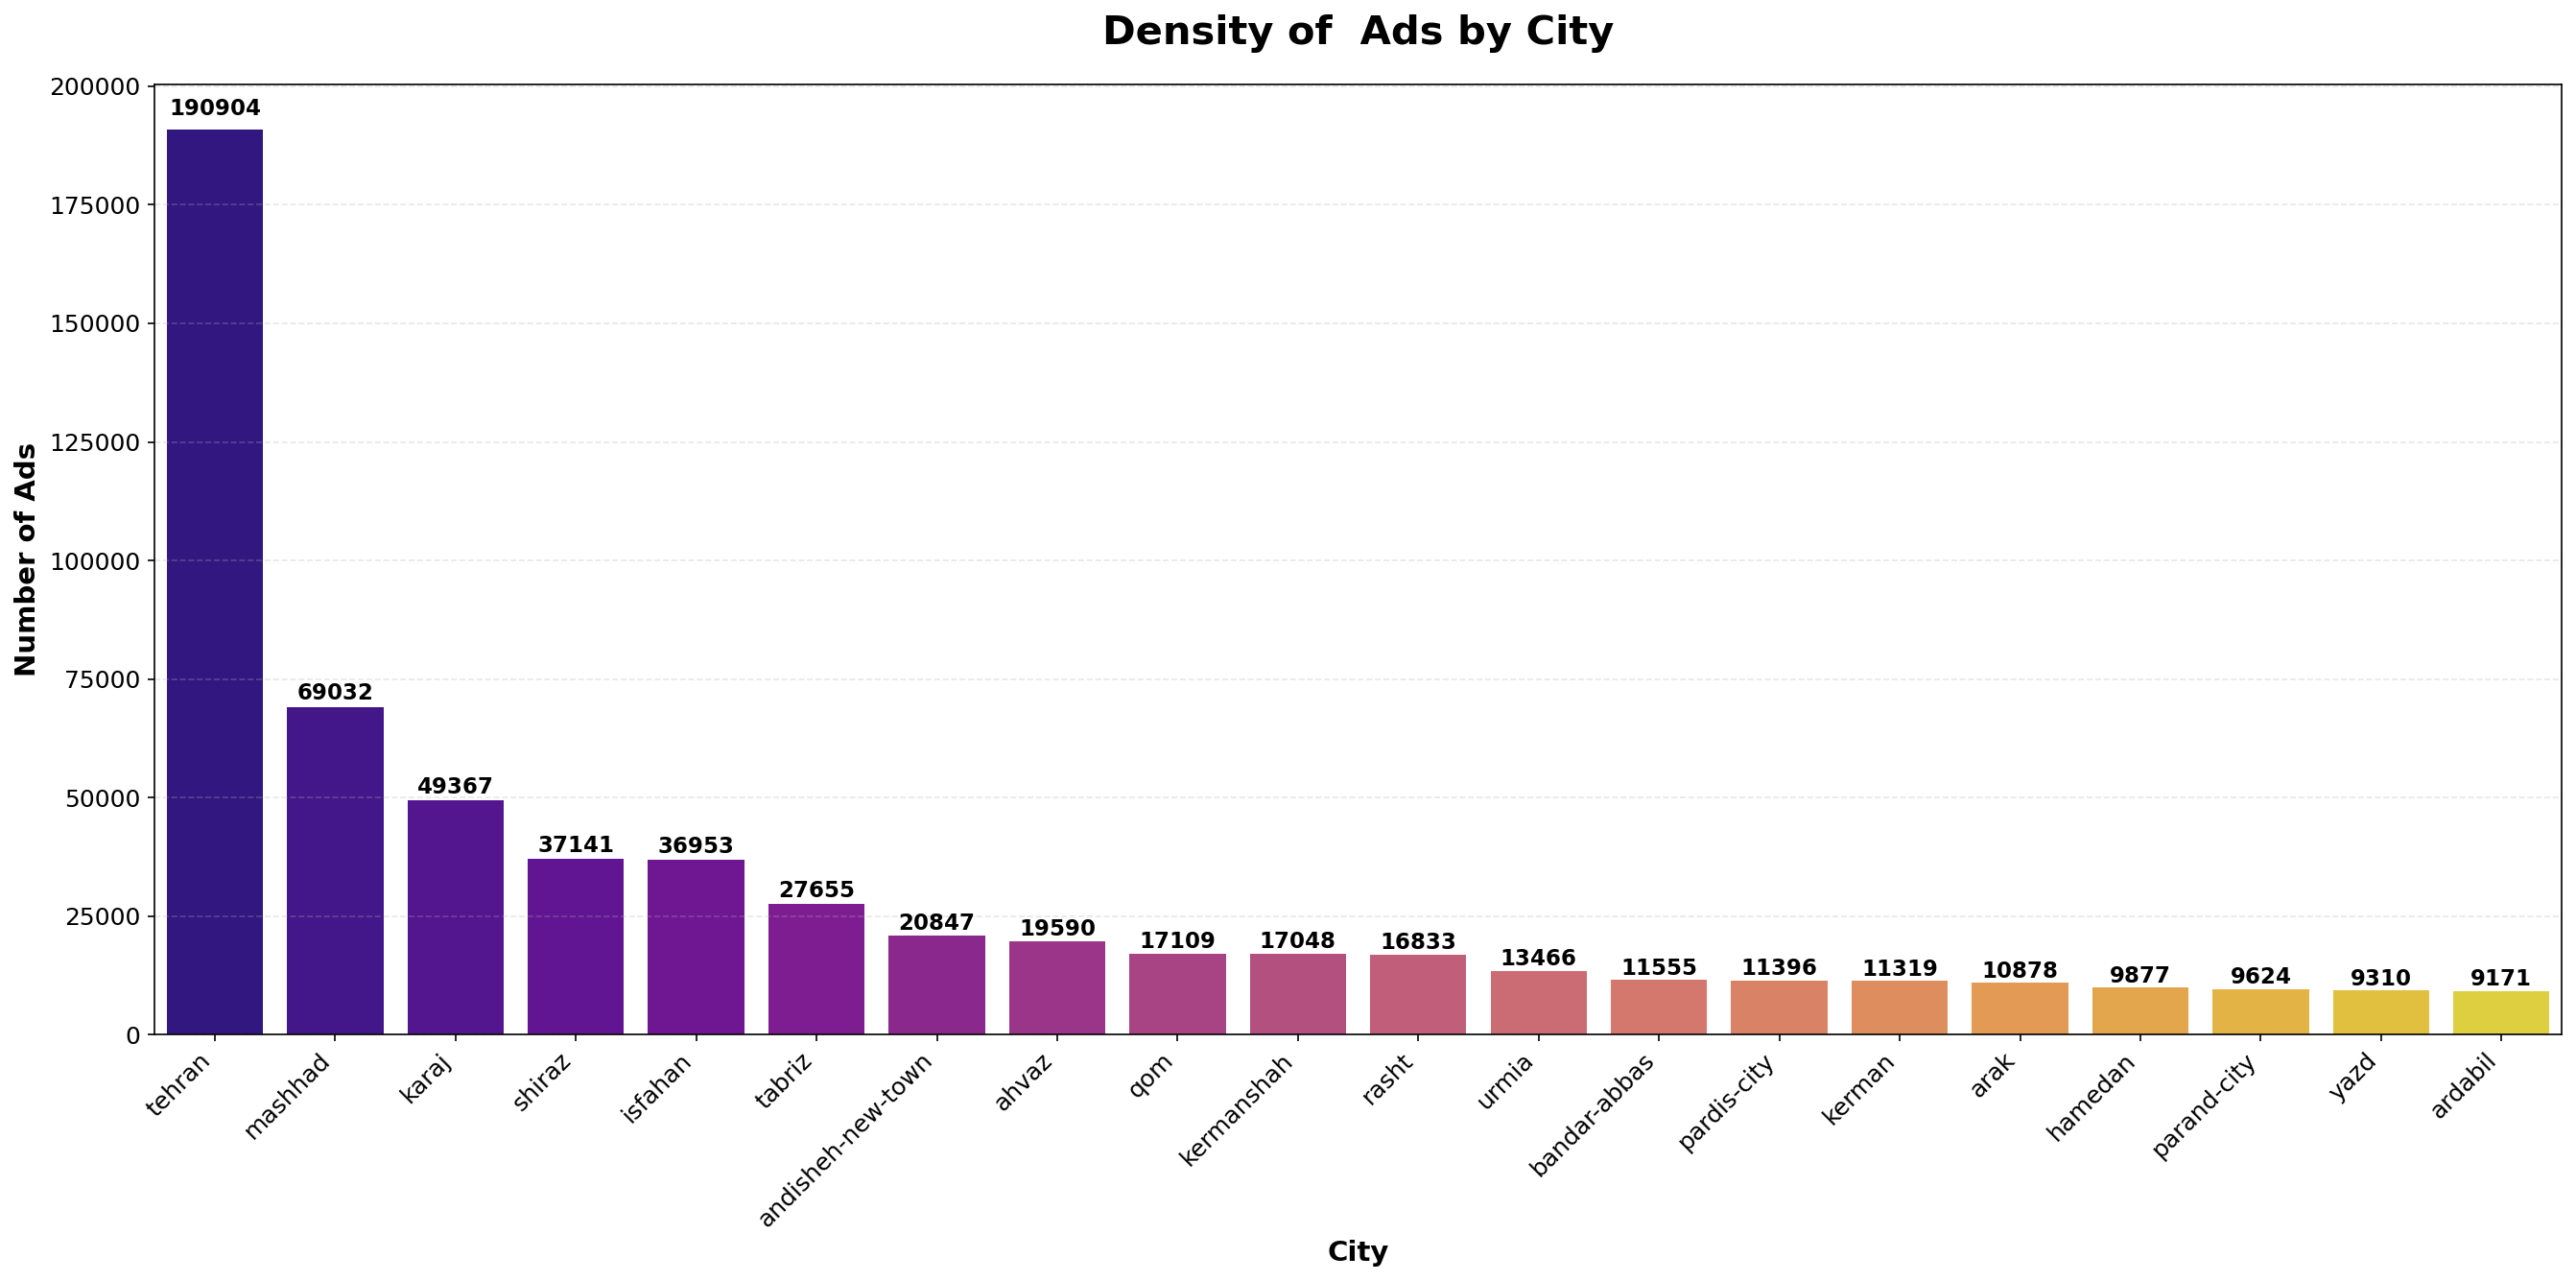

In [ ]:
# part 5
plt.figure(figsize=(18, 9), dpi=150)

# Sort cities by count
city_counts = df['city_slug'].value_counts().head(20)

sns.barplot(
    x=city_counts.index,
    y=city_counts.values,
    palette="plasma"
)

plt.title("Density of  Ads by City", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("City", fontsize=14, weight="bold")
plt.ylabel("Number of Ads", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", alpha=0.3, linestyle="--")

# Annotate counts on top of bars
for i, val in enumerate(city_counts.values):
    plt.text(i, val + (val * 0.01), str(val), ha="center",
             va="bottom", fontsize=11, weight="bold")

plt.tight_layout()
plt.show()

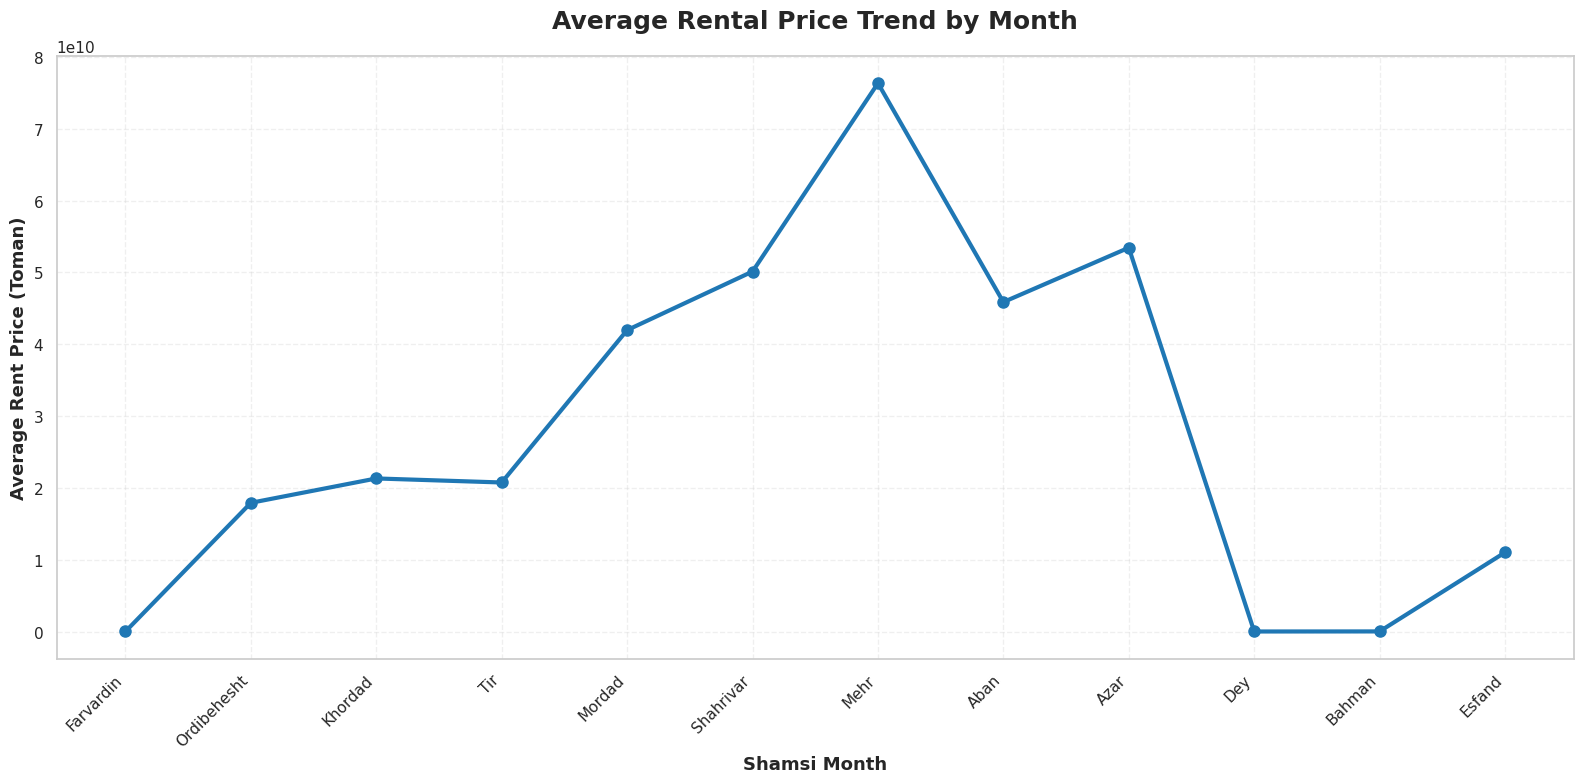

In [ ]:

# Filter rent ads
rent_data = df[df['ad_type'] == 'rent'].copy()

if len(rent_data) > 0:

    # Aggregate average rent per Shamsi month
    monthly_rent = rent_data.groupby('shamsi_month')[
        'rent_value'].mean().reset_index()

    # Ensure correct month order
    month_order = list(shamsi_month_map.values())
    monthly_rent['shamsi_month'] = pd.Categorical(
        monthly_rent['shamsi_month'],
        categories=month_order,
        ordered=True
    )
    monthly_rent = monthly_rent.sort_values('shamsi_month')

    plt.figure(figsize=(16, 8))
    plt.plot(
        monthly_rent['shamsi_month'],
        monthly_rent['rent_value'],
        marker='o',
        markersize=8,
        linewidth=3,
        color='#1f77b4',
        label='Average Rent'
    )

    # Titles and labels
    plt.title('Average Rental Price Trend by Month',
              fontsize=18, weight='bold', pad=20)
    plt.xlabel('Shamsi Month', fontsize=13, weight='bold')
    plt.ylabel('Average Rent Price (Toman)', fontsize=13, weight='bold')

    # Improve x-axis readability
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)

    # Grid and layout
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

In [23]:

# Extract Shamsi year and month directly
df['shamsi_year'] = df['shamsi_date'].apply(
    lambda x: x.year if x is not None else None)
df['shamsi_month'] = df['shamsi_date'].apply(
    lambda x: shamsi_month_map[x.month] if x is not None else None)


inflation_rates = {
    1400: 40.2,  # 40.2%
    1401: 45.8,  # 45.8%
    1402: 46.4,  # 46.4%
    1403: 35.0   # 35.0% (estimated)
}

# Convert to percentage and create deflator (100 = base year 1400)
deflator_base_1400 = 100
deflators = {}
current_deflator = deflator_base_1400

# Calculate cumulative deflators for each year
for year in sorted(inflation_rates.keys()):
    current_deflator = current_deflator * (1 + inflation_rates[year]/100)
    deflators[year] = current_deflator

print("Deflators (Base 1400 = 100):")
for year, deflator in deflators.items():
    print(f"Year {year}: {deflator:.1f}")

# Filter data for years 1400-1403 and valid transformable_price
df_filtered = df[
    (df['shamsi_year'].between(1400, 1403)) & 
    (df['transformable_price'].notna()) &
    (df['transformable_price'] > 0)
].copy()

# Calculate real price (adjust for inflation)
df_filtered['deflator'] = df_filtered['shamsi_year'].map(deflators)
df_filtered['real_price'] = (df_filtered['transformable_price'] / 
                            df_filtered['deflator']) * deflator_base_1400

# Calculate yearly averages using proper aggregation
yearly_analysis = df_filtered.groupby('shamsi_year').agg(
    nominal_price_avg=('transformable_price', 'mean'),
    real_price_avg=('real_price', 'mean'),
    count=('transformable_price', 'count')
).reset_index()



Deflators (Base 1400 = 100):
Year 1400: 140.2
Year 1401: 204.4
Year 1402: 299.3
Year 1403: 404.0


Cumulative Inflation Index:
Year 1400: 100.0
Year 1401: 145.8
Year 1402: 213.5
Year 1403: 288.2

Yearly Average Prices:
   shamsi_year   price_value    real_price
2         1400  1.066667e+09  1.066667e+09
3         1401  1.882049e+10  1.290843e+10
4         1402  7.918916e+09  3.709942e+09
5         1403  1.743388e+10  6.050087e+09

=== TREND ANALYSIS ===
Nominal Price Trend:
  1400 → 1401: +1664.4%
  1401 → 1402: -57.9%
  1402 → 1403: +120.2%

Real Price Trend:
  1400 → 1401: +1110.2%
  1401 → 1402: -71.3%
  1402 → 1403: +63.1%


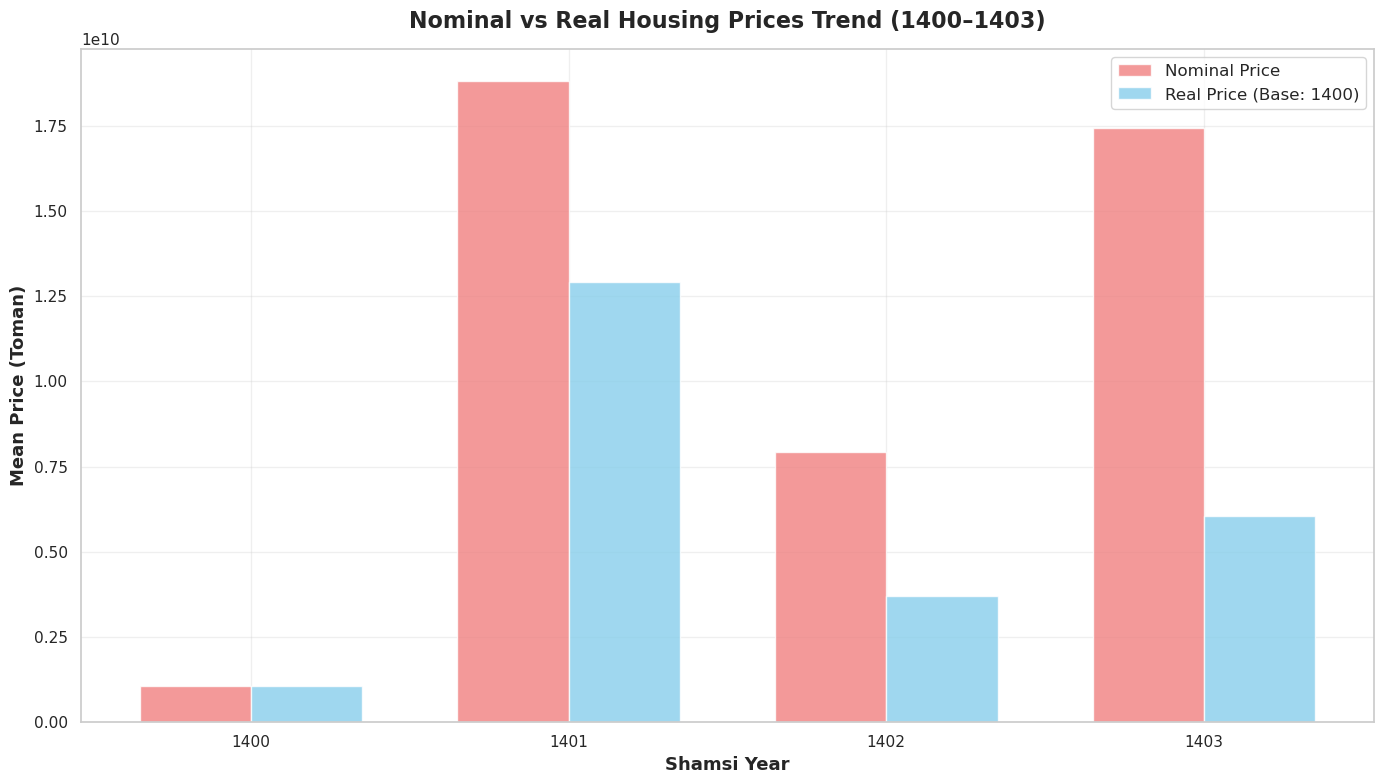


Real Price as % of Nominal Price:
Year 1400: 100.0%
Year 1401: 68.6%
Year 1402: 46.8%
Year 1403: 34.7%


In [27]:
# Extract Shamsi year and month directly
df['shamsi_year'] = df['shamsi_date'].apply(
    lambda x: x.year if x is not None else None)
df['shamsi_month'] = df['shamsi_date'].apply(
    lambda x: shamsi_month_map[x.month] if x is not None else None)

# Inflation rates for each year (annual inflation percentage)
inflation_rates = {
    1400: 40.2,
    1401: 45.8, 
    1402: 46.4,
    1403: 35.0
}

# Calculate cumulative inflation index with base year 1400 = 100
base_year = 1400
inflation_index = {}
inflation_index[1400] = 100  # Base year

# Calculate cumulative inflation for subsequent years
inflation_index[1401] = inflation_index[1400] * (1 + inflation_rates[1401]/100)
inflation_index[1402] = inflation_index[1401] * (1 + inflation_rates[1402]/100)  
inflation_index[1403] = inflation_index[1402] * (1 + inflation_rates[1403]/100)

print("Cumulative Inflation Index:")
for year, index in inflation_index.items():
    print(f"Year {year}: {index:.1f}")

# Calculate real price by deflating nominal prices
# Real Price = Nominal Price × (Base Year Index / Current Year Index)
df['real_price'] = df.apply(lambda row: 
    row['price_value'] * (inflation_index[base_year] / inflation_index[row['shamsi_year']]) 
    if row['shamsi_year'] in inflation_index and row['price_value'] is not None
    else None, axis=1)

# Calculate yearly averages
yearly_prices = df.groupby('shamsi_year')[
    ['price_value', 'real_price']].mean().reset_index()

# Remove any rows with NaN values
yearly_prices = yearly_prices.dropna()

print("\nYearly Average Prices:")
print(yearly_prices)

# Visualization
plt.figure(figsize=(14, 8))
x = range(len(yearly_prices))
width = 0.35

plt.bar([i - width/2 for i in x], yearly_prices['price_value'],
        width, label='Nominal Price', color='lightcoral', alpha=0.8)
plt.bar([i + width/2 for i in x], yearly_prices['real_price'],
        width, label='Real Price (Base: 1400)', color='skyblue', alpha=0.8)

plt.xlabel('Shamsi Year', fontsize=13, weight='bold')
plt.ylabel('Mean Price (Toman)', fontsize=13, weight='bold')
plt.title('Nominal vs Real Housing Prices Trend (1400–1403)', 
          fontsize=16, fontweight='bold', pad=15)
plt.xticks(x, yearly_prices['shamsi_year'].astype(int))
plt.legend(fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add trend analysis
print("\n=== TREND ANALYSIS ===")
print("Nominal Price Trend:")
for i in range(1, len(yearly_prices)):
    prev_nominal = yearly_prices.iloc[i-1]['price_value']
    curr_nominal = yearly_prices.iloc[i]['price_value']
    change_nominal = ((curr_nominal - prev_nominal) / prev_nominal) * 100
    print(f"  {yearly_prices.iloc[i-1]['shamsi_year']:.0f} → {yearly_prices.iloc[i]['shamsi_year']:.0f}: {change_nominal:+.1f}%")

print("\nReal Price Trend:")
for i in range(1, len(yearly_prices)):
    prev_real = yearly_prices.iloc[i-1]['real_price']
    curr_real = yearly_prices.iloc[i]['real_price']
    change_real = ((curr_real - prev_real) / prev_real) * 100
    print(f"  {yearly_prices.iloc[i-1]['shamsi_year']:.0f} → {yearly_prices.iloc[i]['shamsi_year']:.0f}: {change_real:+.1f}%")

plt.show()

# Additional analysis: Calculate price-to-inflation ratio
yearly_prices['price_inflation_ratio'] = yearly_prices['real_price'] / yearly_prices['price_value'] * 100
print(f"\nReal Price as % of Nominal Price:")
for _, row in yearly_prices.iterrows():
    print(f"Year {row['shamsi_year']:.0f}: {row['price_inflation_ratio']:.1f}%")

In [29]:
cols = ['price_value', 'land_size', 'building_size', 
                   'regular_person_capacity', 'rooms_count', 
                   'location_latitude', 'location_longitude']


for col in cols:
    pct = df[col].isna().mean() * 100
    print(f"{col}: {pct:.2f}% missing")

    

price_value: 43.17% missing
land_size: 81.36% missing
building_size: 1.96% missing
regular_person_capacity: 97.01% missing
rooms_count: 15.41% missing
location_latitude: 34.44% missing
location_longitude: 34.44% missing


In [ ]:
df[cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   price_value              568346 non-null   float64
 1   land_size                186396 non-null   float64
 2   building_size            980394 non-null   float64
 3   regular_person_capacity  29870 non-null    float64
 4   rooms_count_num          1000000 non-null  float64
 5   location_latitude        655608 non-null   float64
 6   location_longitude       655608 non-null   float64
dtypes: float64(7)
memory usage: 53.4 MB


In [30]:
df['regular_person_capacity'].unique()

array([ 4., nan,  8.,  5.,  2., 10.,  6., 15.,  3.,  1.,  7., 12., 40.,
       30., 20., 50., 13., 25.,  9., 17., 16., 11., 14., 35., 26., 24.,
       33., 27., 18., 42., 34., 21., 22., 28., 45., 32., 19., 37., 23.,
       29., 38., 36., 44., 49., 31., 43., 46., 48., 39., 47.])

In [34]:
df['rooms_count'].unique()

array([3., 1., 2., 0., 4., 5.])

In [33]:
rooms_map = {
    'بدون اتاق': 0,
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار': 4,
    'پنج یا بیشتر': 5
}

# Step 2: Apply mapping (NaN values remain NaN)
df['rooms_count'] = df['rooms_count'].map(rooms_map)

# Step 3: Fill NaN with median to preserve distribution
median_rooms = df['rooms_count_num'].median()
mode_rooms = df['rooms_count'].mode()[0]  # mode() returns a Series, take first element
df['rooms_count'].fillna(mode_rooms, inplace=True)


# Optional: check the result
df[['rooms_count', 'rooms_count_num']].head(10)

,rooms_count,rooms_count_num
0,3.0,3.0
1,1.0,1.0
2,3.0,3.0
3,1.0,1.0
4,2.0,2.0
5,2.0,2.0
6,2.0,2.0
7,2.0,2.0
8,2.0,2.0
9,2.0,2.0


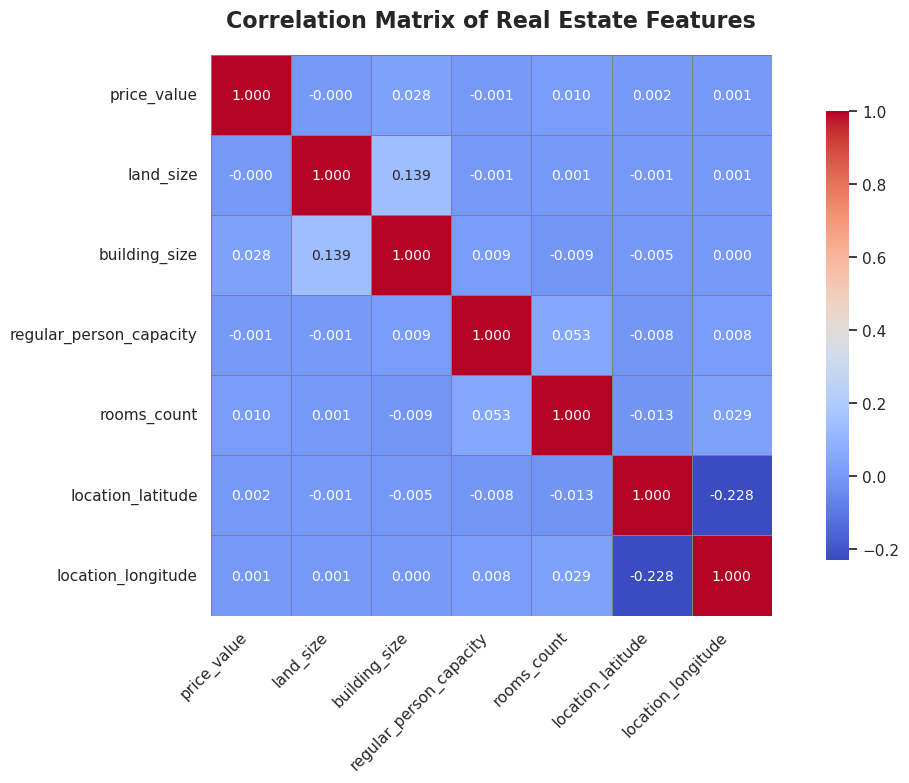

In [ ]:

# -------------------------------
cols = [
    'price_value',              # Price
    'land_size',                # Land area
    'building_size',            # Building area
    'regular_person_capacity',  # Capacity
    'rooms_count',              # Number of rooms
    'location_latitude',        # Latitude
    'location_longitude'        # Longitude
]


df_corr = df[cols]

# Convert to numeric, invalid entries -> NaN
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')


# Fill NaN with median of each column
df_corr = df_corr.fillna(df_corr.median(numeric_only=True))

# Drop any remaining NaNs
df_corr = df_corr.dropna(how='any')


# -------------------------------
corr_matrix = df_corr.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 10},
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Correlation Matrix of Real Estate Features",
    fontsize=16,
    fontweight="bold",
    pad=20
)

# Rotate axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()



In [ ]:
luxury_features = ['has_balcony', 'has_elevator', 'has_security_guard', 'has_barbecue', 'has_pool']

for col in luxury_features:
    df[col] = df[col].map({False: 0, True: 1})
    
df[luxury_features] = df[luxury_features].fillna(0)    

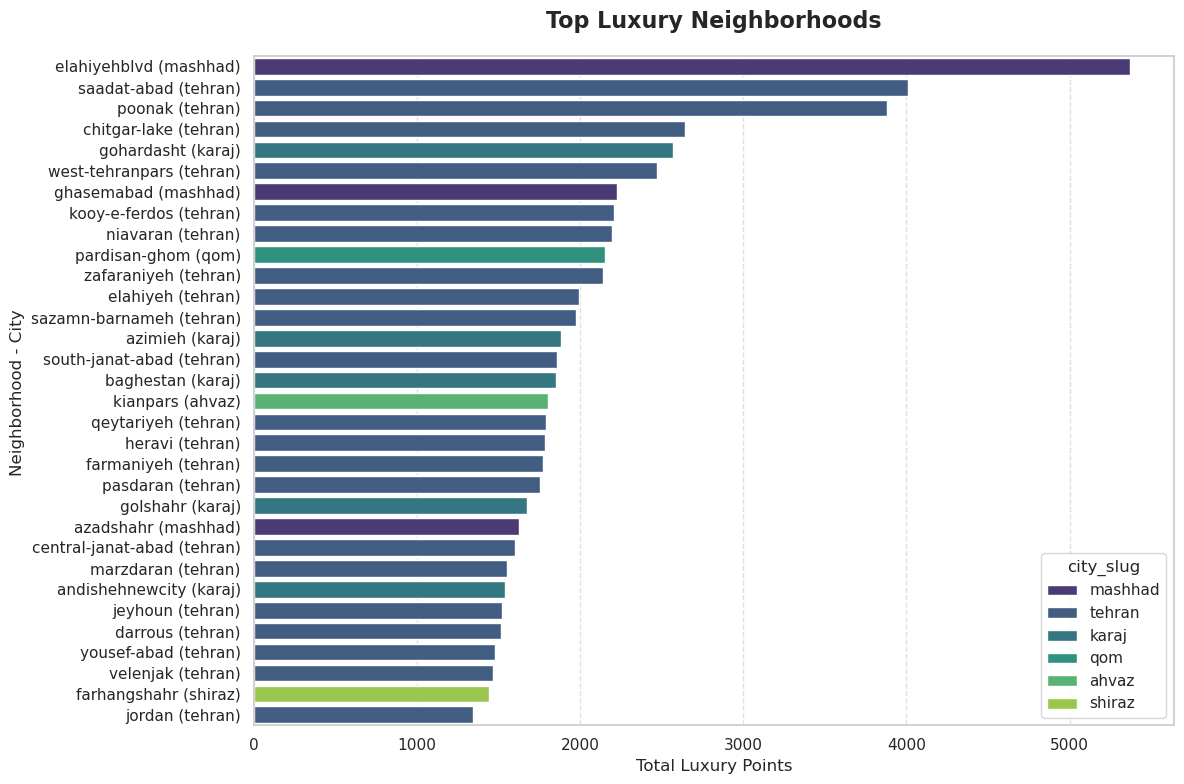

In [41]:


# Make sure NaN → 0
df[luxury_features] = df[luxury_features].fillna(0).astype(int)

# Sum all luxury features into one "luxury score" per property
df["luxury_score"] = df[luxury_features].sum(axis=1)

# Group by neighborhood (and city), sum the scores
luxury_by_neigh = (
    df.groupby(["city_slug", "neighborhood_slug"])["luxury_score"]
    .sum()
    .reset_index()
    .sort_values("luxury_score", ascending=False)
)


luxury_by_neigh["neigh_city"] = (
    luxury_by_neigh["neighborhood_slug"] + " (" + luxury_by_neigh["city_slug"] + ")"
)

# Show top 15 neighborhoods with highest luxury points
top_neigh = luxury_by_neigh.head(32)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_neigh,
    x="luxury_score",
    y="neigh_city",
    hue="city_slug",
    dodge=False,
    palette="viridis"
)
plt.title("Top Luxury Neighborhoods", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Total Luxury Points")
plt.ylabel("Neighborhood - City ")

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
